In [5]:
## Rastrigin Function 


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rastrigin(x, A = 10):
    return A * len(x) + sum([xi ** 2 - A*np.cos(2 * np.pi * xi) for xi in x])

Rendering frame: 0
current_best shape: (2,)
current_best: [-1.04376955 -0.17713481]
-0.17713480765092537
TYPE + VALUE: <class 'numpy.ndarray'> [-1.04376955 -0.17713481]
Rendering frame: 1
current_best shape: (2,)
current_best: [-1.0218179 -1.0380027]
-1.0380027044003066
TYPE + VALUE: <class 'numpy.ndarray'> [-1.0218179 -1.0380027]
Rendering frame: 2
current_best shape: (2,)
current_best: [-0.72584454 -2.19587575]
-2.1958757532318876
TYPE + VALUE: <class 'numpy.ndarray'> [-0.72584454 -2.19587575]
Rendering frame: 3
current_best shape: (2,)
current_best: [-0.70086191 -2.29360995]
-2.2936099538386894
TYPE + VALUE: <class 'numpy.ndarray'> [-0.70086191 -2.29360995]
Rendering frame: 4
current_best shape: (2,)
current_best: [-1.07162979 -0.84313434]
-0.8431343413792407
TYPE + VALUE: <class 'numpy.ndarray'> [-1.07162979 -0.84313434]
Rendering frame: 5
current_best shape: (2,)
current_best: [-1.38936846  0.39988647]
0.3998864741237933
TYPE + VALUE: <class 'numpy.ndarray'> [-1.38936846  0.399886

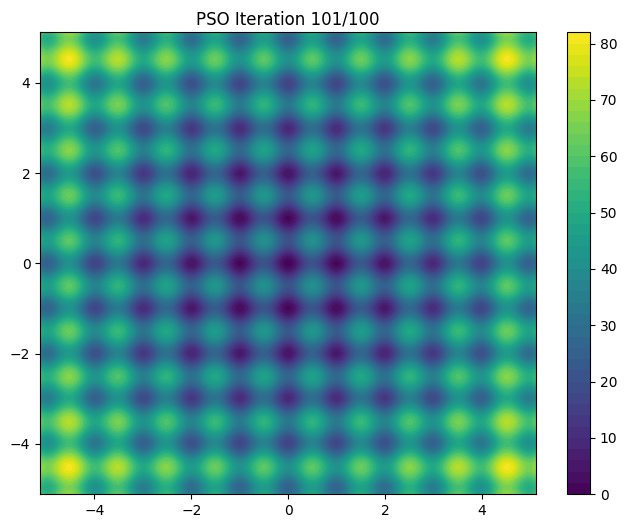

: 

In [ ]:
# Fixing the syntax error in the rastrigin function definition
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Rastrigin function
def rastrigin(position, A=10):
    x, y = position
    return A * 2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

# PSO parameters
num_particles = 30        # Number of candidate solutions (particles)
num_iterations = 100      # Number of iterations (generations)
w = .9                  # Inertia weight (balances exploration vs exploitation)
c1 = 1.5                  # Cognitive component (particle's own best)
c2 = 1.5                  # Social component (global best from swarm)
bounds = [-5.12, 5.12]    # Search space boundaries for Rastrigin function


# Initialization
particles = np.random.uniform(bounds[0], bounds[1], (num_particles, 2)) ## Unifromially initalize partiacles to equally
velocities = np.random.uniform(-1, 1, (num_particles, 2))

## Personal Best Scores
p_best = particles.copy() 
p_best_scores = np.array([rastrigin(p) for p in particles]) # Calculating intial fitness Score

## Global Best Scores
g_best = p_best[np.argmin(p_best_scores)] 
g_best_score = np.min(p_best_scores) # Calculating Global Best Score
trajectory = [particles.copy()]
g_best_positions = [g_best.copy()]

# PSO main loop
for _ in range(num_iterations):
    for i in range(num_particles):
        r1, r2 = np.random.rand(2) # Variablitty coefficents ranging [0.00, 1.00)
        
        # Calculating new velocities utilizin PSO
        velocities[i] = (
            w * velocities[i] +
            c1 * r1 * (p_best[i] - particles[i]) +
            c2 * r2 * (g_best - particles[i])
        )
        

        # Updating position of particles and bounding them to Rastrigin Function
        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], bounds[0], bounds[1])
        ## Calculating new Score
        score = rastrigin(particles[i])

        # Updating global and personal score if applicable
        if score < p_best_scores[i]:
            p_best[i] = particles[i]
            p_best_scores[i] = score
            if score < g_best_score:
                g_best = particles[i]
                g_best_score = score
    trajectory.append(particles.copy())
    g_best_positions.append(np.array(g_best).flatten())


x = np.linspace(bounds[0], bounds[1], 400)
y = np.linspace(bounds[0], bounds[1], 400)
X, Y = np.meshgrid(x, y)
Z = rastrigin((X, Y))

fig, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(contour, ax=ax)

scat = ax.scatter([], [], color='white', edgecolor='black')  # Particle scatter
g_best_marker = ax.scatter([], [], color='red', s=100, marker='*')

# ---------------------------------------
# Animation Functions
# ---------------------------------------
def init():
    scat.set_offsets(np.empty((0, 2)))  # OK
    g_best_marker.set_offsets(np.empty((0, 2)))  
    return scat, g_best_marker

def update(frame):
    print(f"Rendering frame: {frame}")
    positions = trajectory[frame]

    current_best = np.array(g_best_positions[frame]).flatten()
    print("current_best shape:", current_best.shape)
    print("current_best:", current_best)

    if current_best.shape != (2,):
        raise ValueError(f"Invalid g_best at frame {frame}: {current_best}")

    # Update plot
    scat.set_offsets(positions)
    print(g_best_marker)
    print(current_best[1])
    print("TYPE + VALUE:", type(current_best), current_best)

    g_best_marker.set_offsets([[float(current_best[0]), float(current_best[1])]])
    ax.set_title(f'PSO Iteration {frame + 1}/{num_iterations}')
    return [scat, g_best_marker]

# ---------------------------------------
# Create and Save  
# ---------------------------------------
ani = animation.FuncAnimation(
    fig, update, frames=len(trajectory),
    init_func=init, blit=False, repeat=False  
)

gif_path = "pso_rastrigin_High_Interia.gif"
ani.save(gif_path, writer='pillow', fps=10)
print(f"GIF saved to: {gif_path}")

'pso_rastrigin_3d_static.gif'

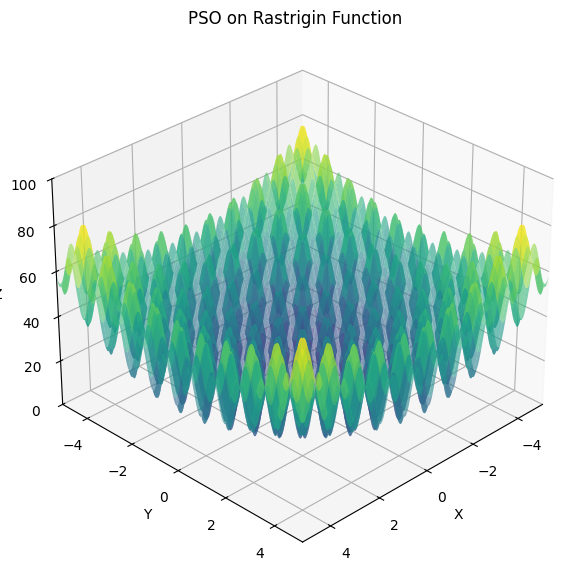

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

# Rastrigin function
def rastrigin(X, Y, A=10):
    return A * 2 + (X**2 - A * np.cos(2 * np.pi * X)) + (Y**2 - A * np.cos(2 * np.pi * Y))

# PSO parameters
num_particles = 30
num_iterations = 50
w, c1, c2 = 0.5, 1.5, 1.5
bounds = [-5.12, 5.12]

# Initialize particles
particles = np.random.uniform(bounds[0], bounds[1], (num_particles, 2))
velocities = np.random.uniform(-1, 1, (num_particles, 2))

# Personal and global bests
p_best = particles.copy()
p_best_scores = np.array([rastrigin(p[0], p[1]) for p in particles])
g_best = p_best[np.argmin(p_best_scores)]
g_best_score = np.min(p_best_scores)

# For animation
trajectory = [particles.copy()]

for _ in range(num_iterations):
    for i in range(num_particles):
        r1, r2 = np.random.rand(2)
        velocities[i] = (
            w * velocities[i] +
            c1 * r1 * (p_best[i] - particles[i]) +
            c2 * r2 * (g_best - particles[i])
        )
        particles[i] += velocities[i]
        particles[i] = np.clip(particles[i], bounds[0], bounds[1])
        score = rastrigin(particles[i][0], particles[i][1])
        if score < p_best_scores[i]:
            p_best[i] = particles[i]
            p_best_scores[i] = score
            if score < g_best_score:
                g_best = particles[i]
                g_best_score = score
    trajectory.append(particles.copy())

# Prepare surface
x = np.linspace(bounds[0], bounds[1], 200)
y = np.linspace(bounds[0], bounds[1], 200)
X, Y = np.meshgrid(x, y)
Z = rastrigin(X, Y)
# Modify the animation to remove the spinning (no azimuth change)

# Create figure again for a fresh static camera view
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[0], bounds[1])
ax.set_zlim(0, 100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('PSO on Rastrigin Function')

# Re-plot the surface and prepare particles
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')
particles_scatter = ax.scatter([], [], [], color='red')

# Static camera angle
static_elev = 30
static_azim = 45
ax.view_init(elev=static_elev, azim=static_azim)

def init_static():
    particles_scatter._offsets3d = ([], [], [])
    return particles_scatter,

def update_static(frame):
    current_particles = trajectory[frame]
    x, y = current_particles[:, 0], current_particles[:, 1]
    z = rastrigin(x, y)
    particles_scatter._offsets3d = (x, y, z)
    return particles_scatter,

# Generate static view animation
ani_static = animation.FuncAnimation(
    fig, update_static, frames=len(trajectory),
    init_func=init_static, blit=False
)

# Save static version as GIF
gif_path_static = "pso_rastrigin_3d_static.gif"
ani_static.save(gif_path_static, writer='pillow', fps=10)

gif_path_static


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# OneMax fitness function
def onemax(position):
    return np.sum(position)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# BPSO with data collection for animation
def binary_pso_visual(num_particles=30, num_bits=20, max_iter=50, w=0.5, c1=1.5, c2=1.5):
    positions = np.random.randint(0, 2, (num_particles, num_bits))
    velocities = np.random.uniform(-1, 1, (num_particles, num_bits))

    pbest = positions.copy()
    pbest_scores = np.array([onemax(p) for p in pbest])
    
    gbest_index = np.argmax(pbest_scores)
    gbest = pbest[gbest_index]
    gbest_score = pbest_scores[gbest_index]

    history = []

    for iteration in range(max_iter):
        fitnesses = []
        for i in range(num_particles):
            r1 = np.random.rand(num_bits)
            r2 = np.random.rand(num_bits)
            velocities[i] = (
                w * velocities[i]
                + c1 * r1 * (pbest[i] - positions[i])
                + c2 * r2 * (gbest - positions[i])
            )

            prob = sigmoid(velocities[i])
            positions[i] = np.where(np.random.rand(num_bits) < prob, 1, 0)

            fitness = onemax(positions[i])
            fitnesses.append(fitness)

            if fitness > pbest_scores[i]:
                pbest[i] = positions[i]
                pbest_scores[i] = fitness
                if fitness > gbest_score:
                    gbest = positions[i]
                    gbest_score = fitness

        history.append((iteration, fitnesses.copy(), gbest_score))

    return history

# Generate convergence data
history = binary_pso_visual()

# Create the animation
fig, ax = plt.subplots()
ax.set_xlim(0, len(history))
ax.set_ylim(0, max([max(fit) for _, fit, _ in history]) + 1)
ax.set_xlabel('Iteration')
ax.set_ylabel('Fitness')
scat = ax.scatter([], [], s=20, label='Particle Fitness')
line, = ax.plot([], [], 'r-', label='Global Best')

fitness_data = []
xdata = []
ydata = []

def update(frame):
    iteration, fitnesses, gbest_score = history[frame]
    scat.set_offsets(np.column_stack(([iteration]*len(fitnesses), fitnesses)))
    xdata.append(iteration)
    ydata.append(gbest_score)
    line.set_data(xdata, ydata)
    return scat, line

ani = animation.FuncAnimation(fig, update, frames=len(history), interval=200, blit=True)
plt.legend()
plt.close()

from pathlib import Path
gif_path = Path("bpso_onemax.gif")
ani.save(gif_path, writer='pillow', fps=5)

gif_path

WindowsPath('bpso_onemax.gif')